In [261]:
import pandas as pd
import matplotlib as mat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('seaborn')

movie = pd.read_csv(r'/Users/koslarin/R/C1-team/movie_industry.csv', encoding='latin-1')

In [262]:
import datetime
def weeknumber(ymd):
    try:
        arr = ymd.split("-")
        y = arr[0]
        m = arr[1]
        d = arr[2]
        return datetime.date(int(y), int(m), int(d)).isocalendar()[1]
    except:
        return -1

In [263]:
    movie["weekrelease"] = movie.apply(lambda row: weeknumber(row["released"]), axis = 1)
    movie = movie[movie["weekrelease"] != -1]

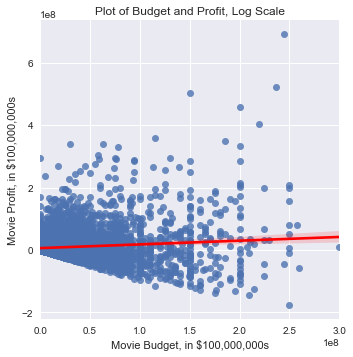

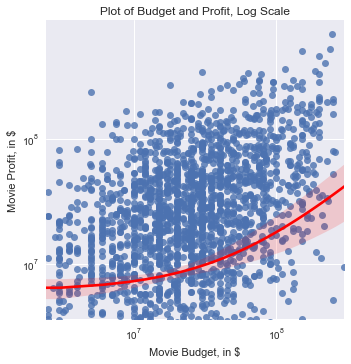

In [264]:
movie['profit'] = movie['gross'] - movie['budget']

g = sns.lmplot("budget", "profit", data = movie, line_kws={'color': 'red'})
mat.pyplot.title('Plot of Budget and Profit, Log Scale')
mat.pyplot.xlabel("Movie Budget, in $100,000,000s")
mat.pyplot.ylabel("Movie Profit, in $100,000,000s")

#mat.pyplot.figure(dpi=200)
g = sns.lmplot("budget", "profit", data = movie, line_kws={'color': 'red'})
mat.pyplot.title('Plot of Budget and Profit, Log Scale')
mat.pyplot.xlabel("Movie Budget, in $")
mat.pyplot.ylabel("Movie Profit, in $")
mat.pyplot.yscale("log")
mat.pyplot.xscale("log")
#mat.pyplot.savefig("High resoltion_nolm.png",dpi=300)

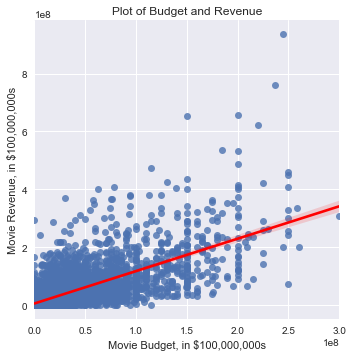

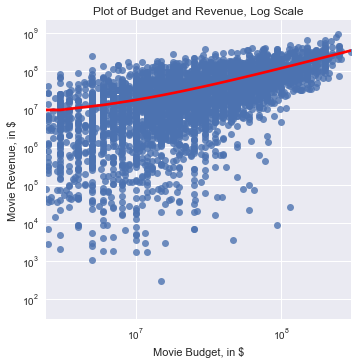

In [107]:

g = sns.lmplot("budget", "gross", data = movie, line_kws={'color': 'red'})
mat.pyplot.title('Plot of Budget and Revenue')
mat.pyplot.xlabel("Movie Budget, in $100,000,000s")
mat.pyplot.ylabel("Movie Revenue, in $100,000,000s")
#mat.pyplot.savefig("Budget_v_Revenue.png",dpi=300)

#mat.pyplot.figure(dpi=200)
g = sns.lmplot("budget", "gross", data = movie, line_kws={'color': 'red'})
mat.pyplot.title('Plot of Budget and Revenue, Log Scale')
mat.pyplot.xlabel("Movie Budget, in $")
mat.pyplot.ylabel("Movie Revenue, in $")
mat.pyplot.yscale("log")
mat.pyplot.xscale("log")
#mat.pyplot.savefig("High resoltion_nolm.png",dpi=300)

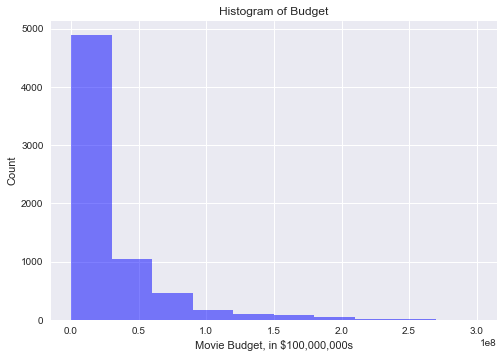

In [57]:
#Profit
num_bins = 10
n, bins, patches = mat.pyplot.hist(movie.budget, num_bins, facecolor='blue', alpha=0.5)
mat.pyplot.title('Histogram of Budget')
mat.pyplot.xlabel("Movie Budget, in $100,000,000s")
mat.pyplot.ylabel("Count")
plt.show()
#mat.pyplot.savefig("Histogram.png",dpi=300)

In [352]:
def week_in_season(week):
    if week < 10:
        return "Winter"
    if week < 23:
        return "Spring"
    if week < 36:
        return "Summer"
    if week < 48:
        return "Autumn"
    else:
        return "Winter"

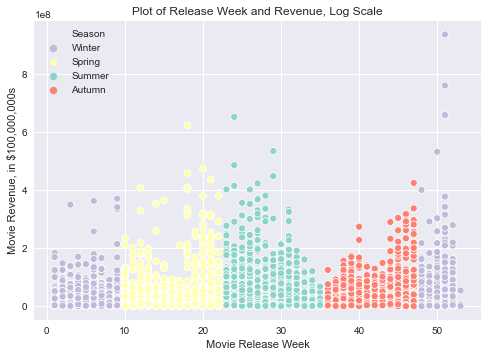

In [355]:

movie["Season"] = movie.apply(lambda row: week_in_season(row["weekrelease"]), axis = 1)

g = sns.scatterplot("weekrelease", "gross", hue = "Season", palette="Set3", data = movie)
mat.pyplot.title('Plot of Release Week and Revenue, Log Scale')
mat.pyplot.xlabel("Movie Release Week")
mat.pyplot.ylabel("Movie Revenue, in $100,000,000s")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,2,1,4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
#mat.pyplot.savefig("Week_Release.png",dpi=300)

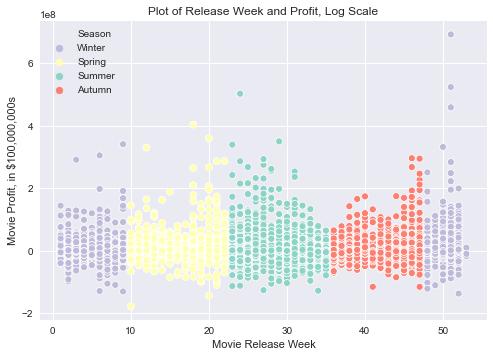

In [356]:
movie["Season"] = movie.apply(lambda row: week_in_season(row["weekrelease"]), axis = 1)

g = sns.scatterplot("weekrelease", "profit", hue = "Season", palette="Set3", data = movie)
mat.pyplot.title('Plot of Release Week and Profit, Log Scale')
mat.pyplot.xlabel("Movie Release Week")
mat.pyplot.ylabel("Movie Profit, in $100,000,000s")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,2,1,4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
#mat.pyplot.savefig("Week_Release_Pr.png",dpi=300)

In [370]:
movie_copy = movie.copy()
for i in range(len(movie_copy.index)):
    #if movie
    if movie_copy.iloc[i,1] == "Columbia Pictures Corporation":
        movie_copy.iloc[i, 1] = "Columbia Pictures"
    if movie_copy.iloc[i,1] == "DreamWorks Animation":
        movie_copy.iloc[i, 1] = "DreamWorks"

movie_c = movie_copy.groupby("company").sum()

top10 = ('Universal Pictures','Paramount Pictures', \
    "Twentieth Century Fox Film Corporation", "Warner Bros.", "New Line Cinema", \
    "Walt Disney Pictures", "Touchstone Pictures", "Lucasfilm", "Columbia Pictures", \
    "DreamWorks")

for i in range(len(movie_copy.index)):
    #if movie
    if movie_copy.iloc[i,1] not in top10:
        movie_copy.iloc[i, 1] = "Other"
#movie_c.sort_values("profit", ascending = False).head(10)

In [382]:
movie_other = movie_copy.groupby("company").sum()

#movie_other.sort_values("profit", ascending = False).head(11)
#movie_other["profit"]

,budget,gross,runtime,score,votes,year,weekrelease,profit
company,,,,,,,,
Warner Bros.,1.659370e+10,2.132132e+10,33414,1870.2,45974211,586284,8352,4.727618e+09
Universal Pictures,1.383213e+10,1.943005e+10,33444,1931.7,35806367,604512,8084,5.597921e+09
Paramount Pictures,1.165660e+10,1.711570e+10,27781,1632.8,29035543,517883,7371,5.459102e+09
Columbia Pictures,1.342171e+10,1.654325e+10,29764,1714.8,29645199,546430,7402,3.121540e+09
Twentieth Century Fox Film Corporation,9.859100e+09,1.478772e+10,21824,1263.7,26917783,408329,5670,4.928623e+09
Walt Disney Pictures,7.561200e+09,1.045551e+10,10510,645.7,11688186,204301,2880,2.894307e+09
DreamWorks,7.017200e+09,9.602095e+09,11031,679.0,16980469,202600,2643,2.584895e+09
New Line Cinema,5.329700e+09,8.540112e+09,18192,1057.0,17717211,344233,4498,3.210412e+09
Touchstone Pictures,3.952200e+09,6.688156e+09,14258,829.8,10049884,261686,3313,2.735956e+09


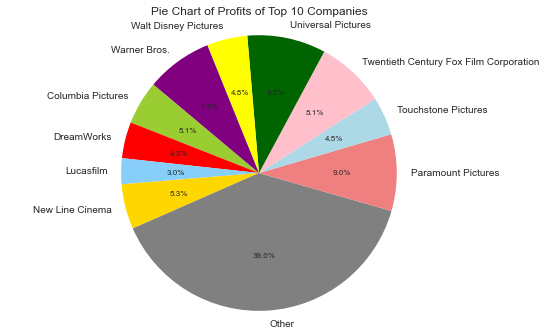

In [396]:
group_profit = movie_other["profit"]#.sort_values(ascending = False)

colors = ['yellowgreen', 'red', 'lightskyblue', 'gold', 
          'grey','lightcoral','lightblue','pink', 'darkgreen', 
          'yellow','purple','violet','magenta','cyan']

top11 = ( "Columbia Pictures", "DreamWorks", "Lucasfilm", "New Line Cinema", "Other", \
         'Paramount Pictures', "Touchstone Pictures", \
        "Twentieth Century Fox Film Corporation", 'Universal Pictures', \
        "Walt Disney Pictures", "Warner Bros.")

plt.pie(group_profit, labels = top11, colors = colors, autopct='%1.1f%%',
        shadow=False, startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.rcParams['font.size'] = 8.0
plt.title("Pie Chart of Profits of Top 10 Companies")
plt.gcf().subplots_adjust(top=0.8)
#mat.pyplot.savefig("Pie_Comp_Pr.png",dpi=300)
plt.show()

In [390]:
top10 = ('Universal Pictures','Paramount Pictures', \
    "Twentieth Century Fox Film Corporation", "Warner Bros.", "New Line Cinema", \
    "Walt Disney Pictures", "Touchstone Pictures", "Metro-Goldwyn-Mayer (MGM)", "Columbia Pictures", \
    "DreamWorks")
movie_copy_rev = movie.copy()
for i in range(len(movie_copy_rev.index)):
    #if movie
    if movie_copy_rev.iloc[i,1] not in top10:
        movie_copy_rev.iloc[i, 1] = "Other"

movie_top_rev = movie_copy_rev.groupby("company").sum()
#movie_c.sort_values("gross", ascending = False).head(15)


,budget,gross,runtime,score,votes,year,weekrelease,profit
company,,,,,,,,
Warner Bros.,1.659370e+10,2.132132e+10,33414,1870.2,45974211,586284,8352,4.727618e+09
Universal Pictures,1.383213e+10,1.943005e+10,33444,1931.7,35806367,604512,8084,5.597921e+09
Paramount Pictures,1.165660e+10,1.711570e+10,27781,1632.8,29035543,517883,7371,5.459102e+09
Columbia Pictures,1.342171e+10,1.654325e+10,29764,1714.8,29645199,546430,7402,3.121540e+09
Twentieth Century Fox Film Corporation,9.859100e+09,1.478772e+10,21824,1263.7,26917783,408329,5670,4.928623e+09
Walt Disney Pictures,7.561200e+09,1.045551e+10,10510,645.7,11688186,204301,2880,2.894307e+09
DreamWorks,7.017200e+09,9.602095e+09,11031,679.0,16980469,202600,2643,2.584895e+09
New Line Cinema,5.329700e+09,8.540112e+09,18192,1057.0,17717211,344233,4498,3.210412e+09
Touchstone Pictures,3.952200e+09,6.688156e+09,14258,829.8,10049884,261686,3313,2.735956e+09


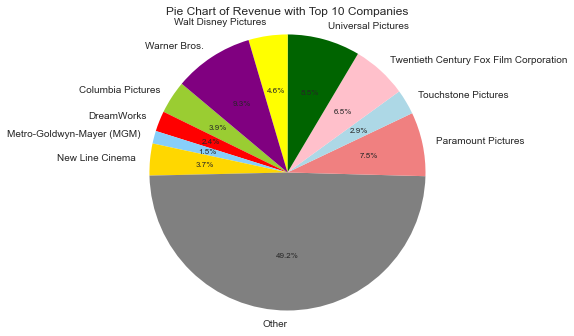

In [397]:
group_revenue = movie_top_rev["gross"]
colors = ['yellowgreen', 'red', 'lightskyblue', 'gold', 
          'grey','lightcoral','lightblue','pink', 'darkgreen', 
          'yellow','purple','violet','magenta','cyan']

top11 = ( "Columbia Pictures", "DreamWorks", "Metro-Goldwyn-Mayer (MGM)", "New Line Cinema", "Other", \
         'Paramount Pictures', "Touchstone Pictures", \
        "Twentieth Century Fox Film Corporation", 'Universal Pictures', \
        "Walt Disney Pictures", "Warner Bros.")

plt.pie(group_revenue, labels = top11, colors = colors, autopct='%1.1f%%',
        shadow=False, startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.rcParams['font.size'] = 8.0
plt.title("Pie Chart of Revenue with Top 10 Companies")
plt.gcf().subplots_adjust(top=0.8)
mat.pyplot.savefig("Pie_Comp_Rev.png",dpi=300)
plt.show()